In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ucimlrepo import fetch_ucirepo

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

maternal_health_risk = fetch_ucirepo(id=863)

X = maternal_health_risk.data.features
y = maternal_health_risk.data.targets

df = pd.concat([X, y], axis=1)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 28.2+ KB


In [5]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicate_count}")


Number of duplicate rows found: 0


In [ ]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


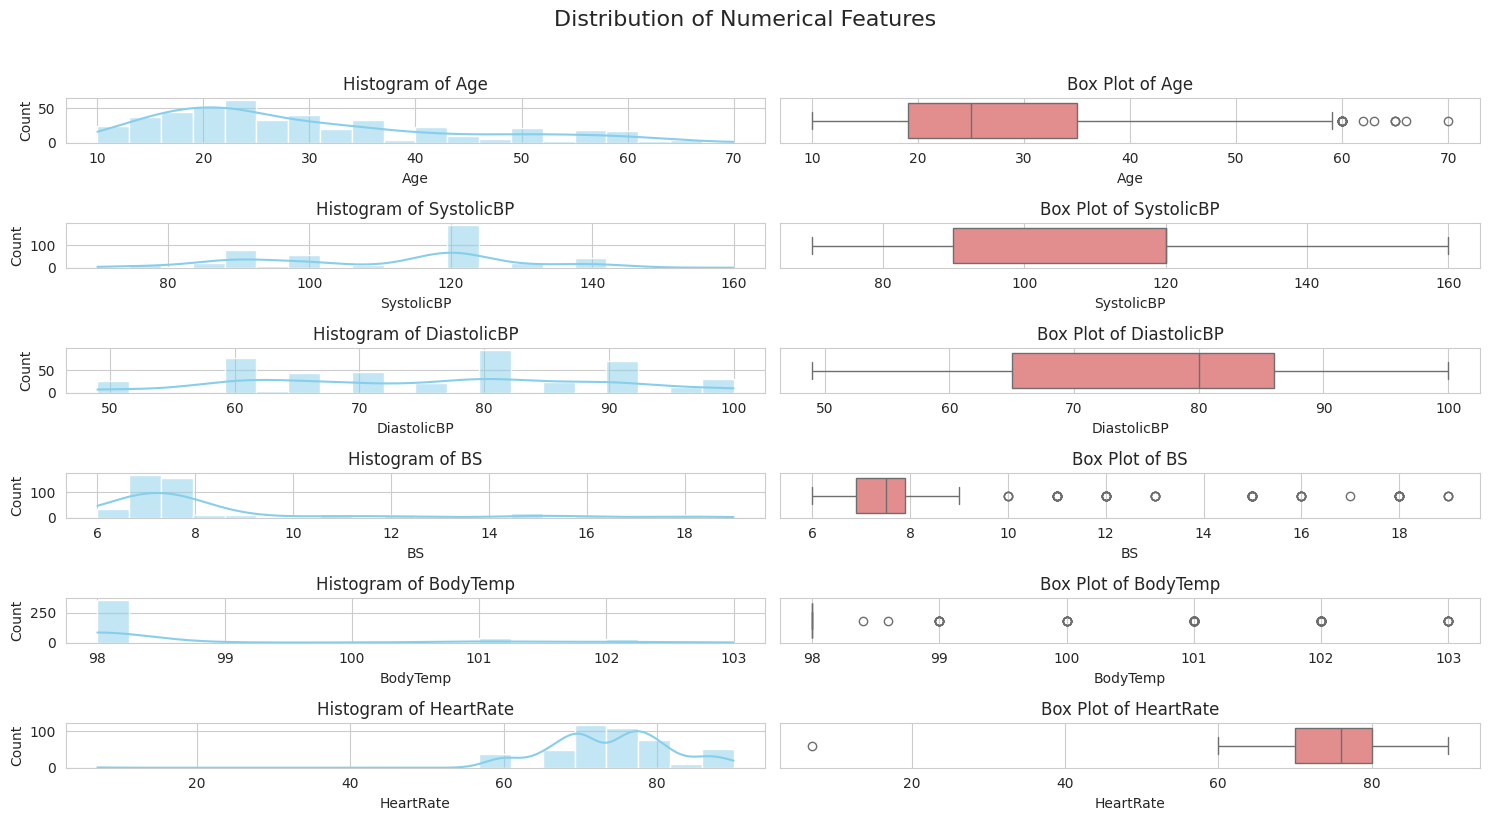

In [20]:
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

fig, axes = plt.subplots(len(numerical_features), 2, figsize=(15, 8))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i, 0], bins=20, color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

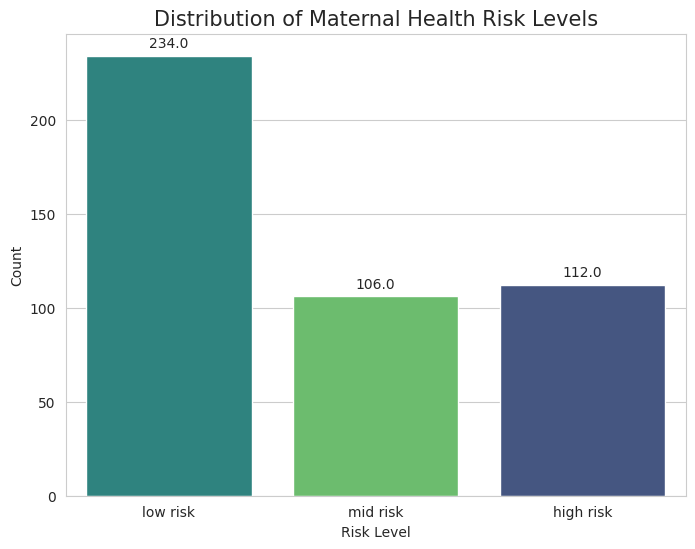

In [ ]:
plt.figure(figsize=(8, 6))
risk_order = ['low risk', 'mid risk', 'high risk']

ax = sns.countplot(x='RiskLevel', data=df, order=risk_order, palette='viridis', hue='RiskLevel', legend=False)

plt.title('Distribution of Maternal Health Risk Levels', fontsize=15)
plt.xlabel('Risk Level')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

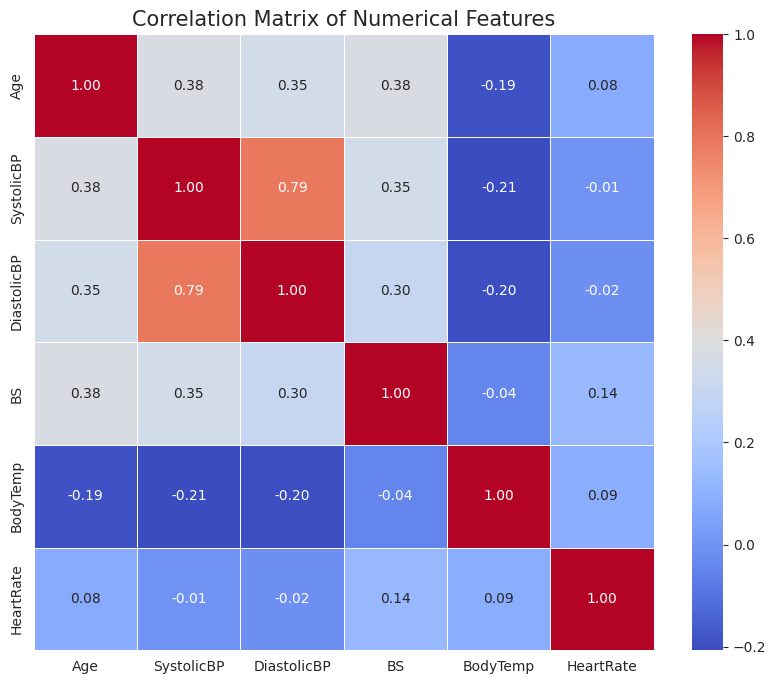

In [ ]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.show()

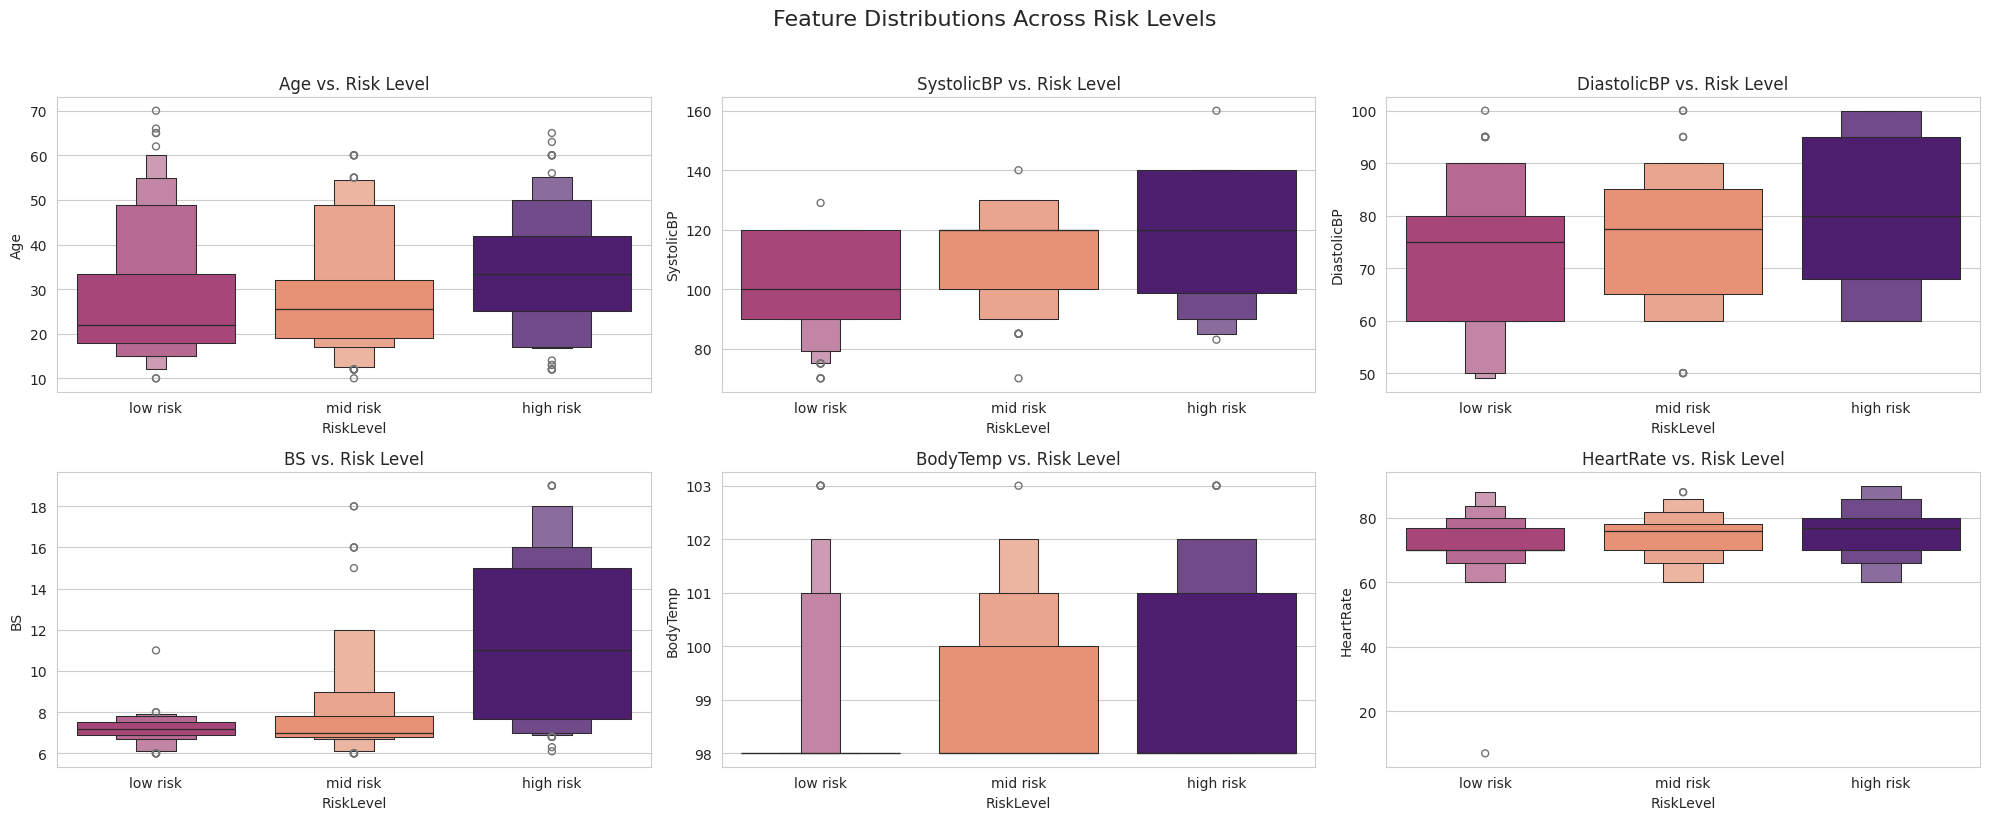

In [18]:
numerical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
fig.suptitle('Feature Distributions Across Risk Levels', fontsize=16, y=1.02)
risk_order = ['low risk', 'mid risk', 'high risk']

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 3)
    
    sns.boxenplot(x='RiskLevel', y=col, data=df, order=risk_order, 
                  ax=axes[row, col_idx], palette='magma', 
                  hue='RiskLevel', legend=False)
                  
    axes[row, col_idx].set_title(f'{col} vs. Risk Level')

plt.tight_layout()
plt.show()

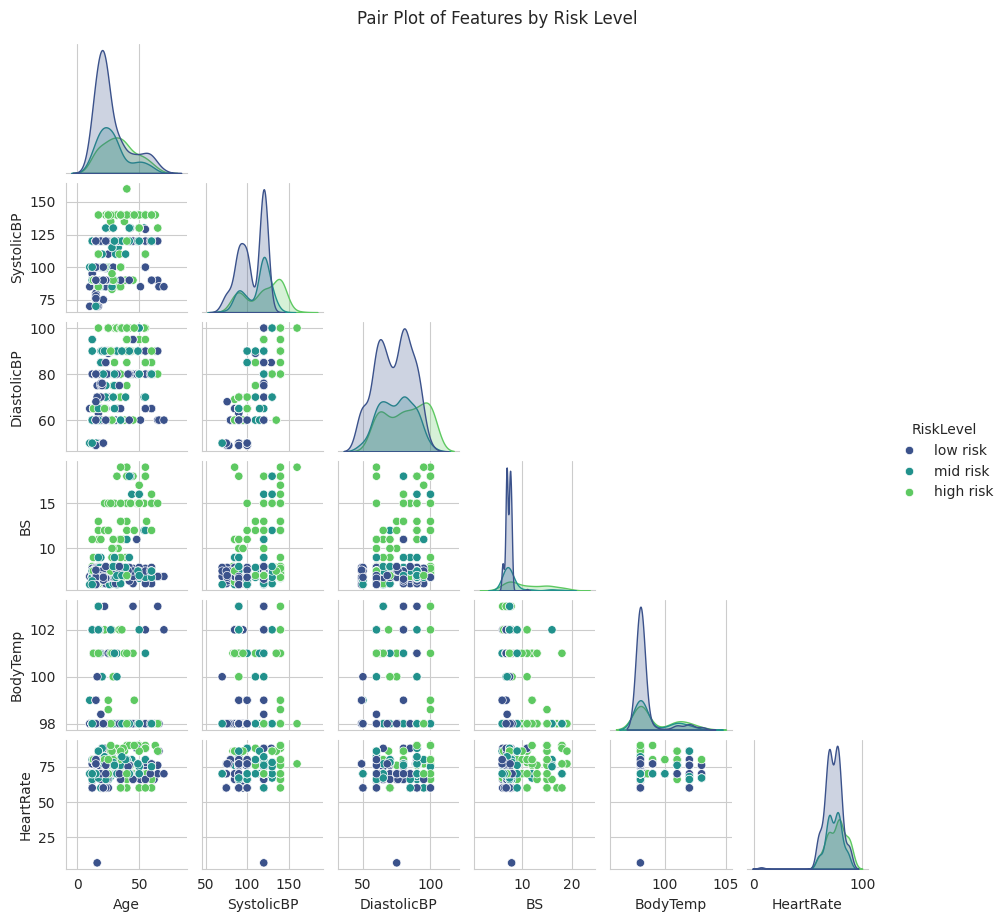

In [24]:

g = sns.pairplot(df, hue='RiskLevel', hue_order=risk_order, palette='viridis', corner=True, height=1.5)

g.figure.suptitle('Pair Plot of Features by Risk Level', y=1.02)

plt.show()